<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Cuaderno_4_Tratamiento_de_Valores_At%C3%ADpicos_(Outliers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 4: Tratamiento de Valores Atípicos (Outliers)
Los valores atípicos son observaciones que se desvían significativamente del resto de los datos. Su identificación y tratamiento son esenciales para mejorar la calidad del análisis y evitar que afecten negativamente los modelos de machine learning.


---
## <font color="red">4.1 ¿Qué es un valor atípico?
Un valor atípico es una observación que es significativamente diferente de otras en un conjunto de datos. Estos valores pueden ser resultado de errores en la recopilación de datos, variaciones extremas o fenómenos inusuales.

### Efecto de los outliers en los modelos de machine learning:
* Los modelos sensibles (regresión lineal, SVM, redes neuronales) pueden generar predicciones sesgadas debido a la influencia de estos valores.
* Los modelos basados en árboles (árboles de decisión, Random Forest) son más robustos, pero un manejo adecuado sigue siendo importante para mejorar la calidad general del análisis.


---

## <font color="red">4.2 Detección de Valores Atípicos
Existen varios métodos para detectar outliers:

### <font color="blue">4.2.1 Boxplot (Diagrama de Cajas)
El boxplot es una herramienta gráfica basada en el rango intercuartílico (IQR).
* Se consideran valores atípicos aquellos que están fuera del rango:

Bigote bajo (el primer cuartil)= $Q1−1.5×IQR$

Bogote alto (el tercer cuartil):$(Q3+1.5×IQR]$

donde Q1 es el primer cuartil y Q3 es el tercer cuartil.



In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset simulado
np.random.seed(42)
data = pd.DataFrame({
    "Edad": np.random.normal(30, 10, 100).tolist() + [100, 120],  # Valores atípicos
    "Ingresos": np.random.normal(50000, 15000, 100).tolist() + [200000, 250000]
})
data

,Edad,Ingresos
0,34.967142,28769.438869
1,28.617357,43690.320159
2,36.476885,44859.282252
3,45.230299,37965.840962
4,27.658466,47580.714325
...,...,...
97,32.610553,52305.876589
98,30.051135,50873.130777
99,27.654129,32855.445533
100,100.000000,200000.000000


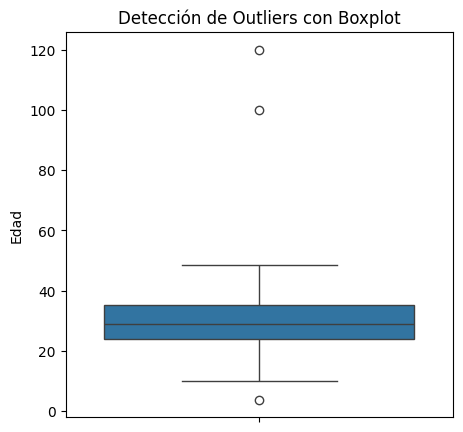

In [22]:
# Visualizar con boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, y="Edad")
plt.title("Detección de Outliers con Boxplot")
plt.show()


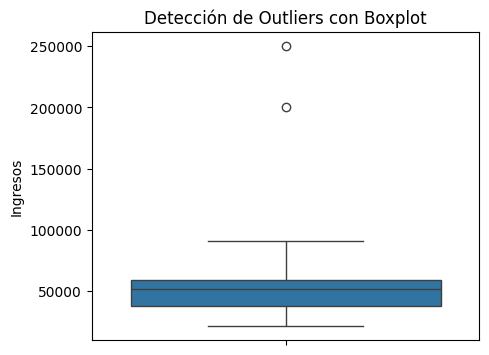

In [23]:
# Visualizar con boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(data=data, y="Ingresos")
plt.title("Detección de Outliers con Boxplot")
plt.show()


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,102.0,30.550524,14.502355,3.802549,24.089491,29.061708,35.091291,120.0
Ingresos,102.0,53759.381182,28376.604542,21218.431771,38037.180875,51900.323533,59239.471764,250000.0


In [25]:
RIQEdad= data["Edad"].quantile(0.75) - data["Edad"].quantile(0.25)
RIQIngresos= data["Ingresos"].quantile(0.75) - data["Ingresos"].quantile(0.25)
BSEdad = data["Edad"].quantile(0.75) + 1.5 * RIQEdad
BSIngresos = data["Ingresos"].quantile(0.75) +1.5 * RIQIngresos
print(f"Bigote Superior Edad: {BSEdad}")
print(f"Bigote Superior Ingresos: {RIQIngresos}")
BIedad= data["Edad"].quantile(0.25) - 1.5 * RIQEdad
BIIngresos= data["Ingresos"].quantile(0.25) - 1.5 * RIQIngresos
print(f"Bigote Inferior Edad: {BIedad}")
print(f"Bigote Inferior Ingresos: {BIIngresos}")

Bigote Superior Edad: 51.59399132343582
Bigote Superior Ingresos: 21202.290889111442
Bigote Inferior Edad: 7.586790809948955
Bigote Inferior Ingresos: 6233.744541328731


### <font color="blue">4.2.2 Z-Score (Puntuación Estándar)

El Z-Score mide cuántas desviaciones estándar se encuentra un dato con respecto a la media.
* Un valor atípico se define como aquel cuya puntuación Z es mayor que un umbral (generalmente 3 o -3).


In [26]:
from scipy.stats import zscore

# Calcular Z-Score
data["Edad_Zscore"] = zscore(data["Edad"])
data["Ingresos_Zscore"] = zscore(data["Ingresos"])

# Filtrar outliers
outliers = data[(data["Edad_Zscore"].abs() > 3) | (data["Ingresos_Zscore"].abs() > 3)]
print("\nOutliers detectados con Z-Score:")
print(outliers)



Outliers detectados con Z-Score:
      Edad  Ingresos  Edad_Zscore  Ingresos_Zscore
100  100.0  200000.0     4.812490         5.179013
101  120.0  250000.0     6.198387         6.949729


### <font color="blue">4.2.3  Puntuaciones IQR (Rango Intercuartílico)
El método IQR utiliza el rango entre el primer y tercer cuartil para identificar valores fuera de los límites.


In [27]:
# Cálculo del IQR
Q1 = data["Edad"].quantile(0.25)
Q3 = data["Edad"].quantile(0.75)
IQR = Q3 - Q1

# Límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_iqr = data[(data["Edad"] < lower_bound) | (data["Edad"] > upper_bound)]
print("\nOutliers detectados con IQR:")
print(outliers_iqr)



Outliers detectados con IQR:
           Edad      Ingresos  Edad_Zscore  Ingresos_Zscore
74     3.802549   54150.36199    -1.853497         0.013846
100  100.000000  200000.00000     4.812490         5.179013
101  120.000000  250000.00000     6.198387         6.949729


## <font color="red">4.3 Estrategias para Manejar Outliers
Una vez identificados los valores atípicos, es importante decidir cómo manejarlos:
### <font color="blue">4.3.1 Eliminación de Outliers
Esta estrategia elimina directamente las filas con valores atípicos. Es útil cuando los valores extremos son errores de medición o no tienen relevancia en el análisis.


In [28]:
# Eliminar outliers basados en IQR
data_cleaned = data[(data["Edad"] > lower_bound) & (data["Edad"] < upper_bound)]
print("\nDatos después de eliminar outliers:")
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned[60:80]



Datos después de eliminar outliers:


,Edad,Ingresos,Edad_Zscore,Ingresos_Zscore
60,25.208258,35379.774947,-0.370191,-0.650901
61,28.143410,61806.269056,-0.166801,0.284975
62,18.936650,67378.933685,-0.804781,0.482327
63,18.037934,37689.765225,-0.867058,-0.569095
64,38.125258,64450.641939,0.524890,0.378624
65,43.562400,56191.713904,0.901656,0.086139
66,29.279899,62330.902400,-0.088048,0.303555
67,40.035329,78451.894740,0.657248,0.874469
68,33.616360,46319.178260,0.212447,-0.263490
69,23.548802,38693.957535,-0.485183,-0.533532


### <font color="blue">4.3.2 Winsorización
Consiste en reemplazar los valores extremos por los límites inferior y superior del rango aceptable.

In [29]:
# Winsorización
data["Edad_Winsorized"] = data["Edad"].clip(lower=lower_bound, upper=upper_bound)
print("\nDatos después de Winsorización:")
print(data[["Edad", "Edad_Winsorized"]])


data['Ingresos_Winsorized'] = data['Ingresos'].clip(lower = BIIngresos, upper = BSIngresos)
print(data[['Ingresos', 'Ingresos_Winsorized']])


Datos después de Winsorización:
           Edad  Edad_Winsorized
0     34.967142        34.967142
1     28.617357        28.617357
2     36.476885        36.476885
3     45.230299        45.230299
4     27.658466        27.658466
..          ...              ...
97    32.610553        32.610553
98    30.051135        30.051135
99    27.654129        27.654129
100  100.000000        51.593991
101  120.000000        51.593991

[102 rows x 2 columns]
          Ingresos  Ingresos_Winsorized
0     28769.438869         28769.438869
1     43690.320159         43690.320159
2     44859.282252         44859.282252
3     37965.840962         37965.840962
4     47580.714325         47580.714325
..             ...                  ...
97    52305.876589         52305.876589
98    50873.130777         50873.130777
99    32855.445533         32855.445533
100  200000.000000         91042.908098
101  250000.000000         91042.908098

[102 rows x 2 columns]


### <font color="blue">4.3.3 Imputación de Outliers
Reemplaza los valores extremos con la media, mediana u otros métodos.


In [30]:
# Reemplazar outliers con la mediana
edad_median = data["Edad"].median()
data["Edad_Imputed"] = data["Edad"].apply(lambda x: edad_median if (x < lower_bound or x > upper_bound) else x)
print("\nDatos después de imputar outliers:")
print(data[["Edad", "Edad_Imputed"]])



Datos después de imputar outliers:
           Edad  Edad_Imputed
0     34.967142     34.967142
1     28.617357     28.617357
2     36.476885     36.476885
3     45.230299     45.230299
4     27.658466     27.658466
..          ...           ...
97    32.610553     32.610553
98    30.051135     30.051135
99    27.654129     27.654129
100  100.000000     29.061708
101  120.000000     29.061708

[102 rows x 2 columns]


## <font color="red">4.4 Visualización Comparativa del Tratamiento


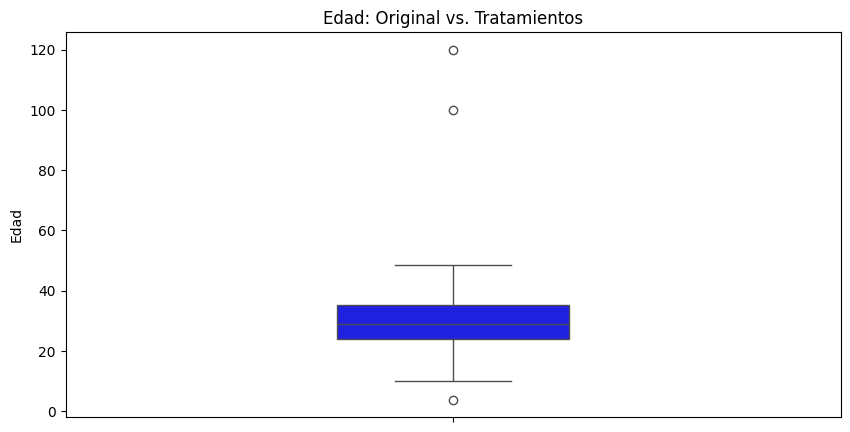

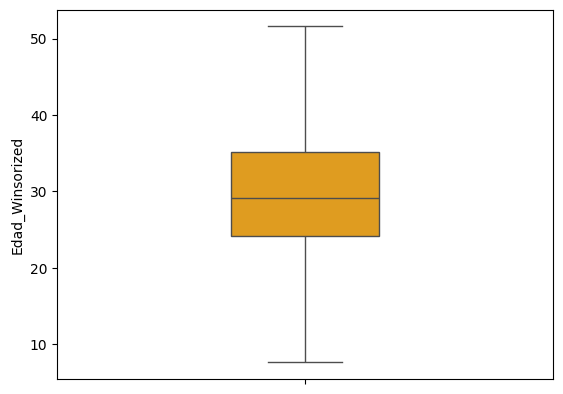

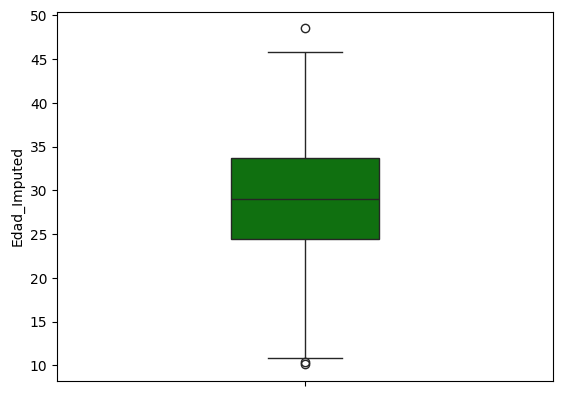

In [31]:
# Visualizar resultados
plt.figure(figsize=(10, 5))

# Original
sns.boxplot(y=data["Edad"], color="blue", width=0.3)
plt.title("Edad: Original vs. Tratamientos")
plt.show()

# Winsorización
sns.boxplot(y=data["Edad_Winsorized"], color="orange", width=0.3)
plt.show()

# Imputación
sns.boxplot(y=data["Edad_Imputed"], color="green", width=0.3)
plt.show()
